### Getting Dataset Ready

In [ ]:
import pandas as pd
import numpy as np
import os
import glob as gb
import matplotlib.pyplot as plt
import cv2

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="58BX6EZLXZvWhy5sZjLn")
# project = rf.workspace("intel-challenge").project("bridge-damage-detection-uvjjb")
# version = project.version(3)
# dataset = version.download("multiclass")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bridge-damage-detection-3 in multiclass:: 100%|██████████| 5332/5332 [00:01<00:00, 5036.50it/s]


In [ ]:

# import os
# import pandas as pd
# import shutil

# # Define the root folder containing train, test, and valid folders
# root_folder = r"/content/bridge-damage-detection-3"  # Replace with the path to your root folder

# # Define the output folder where the organized dataset will be saved
# output_folder = r"/content/updated"  # Replace with the desired output folder

# # Define classes based on the columns in the CSV
# classes = ["corrosion", "crack", "freelime", "leakage", "spalling"]

# # Function to count total images in train, test, and valid folders
# def count_total_images():
#     total_images = 0
#     for split in ["train", "test", "valid"]:
#         split_folder = os.path.join(root_folder, split)
#         if os.path.exists(split_folder):
#             # Count only image files (e.g., .jpg, .png)
#             num_images = len([f for f in os.listdir(split_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])
#             print(f"Number of images in {split}: {num_images}")
#             total_images += num_images
#         else:
#             print(f"Folder not found: {split_folder}")
#     print(f"Total images (train + test + valid): {total_images}")

# # Print total number of images
# count_total_images()

# # Create output directories
# for split in ["train", "test", "valid"]:
#     for class_name in classes:
#         os.makedirs(os.path.join(output_folder, split, class_name), exist_ok=True)

# # Function to organize images into class folders
# def organize_images(split_name):
#     # Path to the CSV file
#     csv_file = os.path.join(root_folder, split_name, "_classes.csv")  # Updated CSV file name
#     print(f"Looking for CSV file at: {csv_file}")  # Debugging: Print the CSV file path

#     # Path to the split folder (where images are located)
#     split_folder = os.path.join(root_folder, split_name)
#     print(f"Looking for images in folder: {split_folder}")  # Debugging: Print the split folder path

#     # Check if CSV file exists
#     if not os.path.exists(csv_file):
#         print(f"CSV file not found: {csv_file}")
#         return

#     # Check if split folder exists
#     if not os.path.exists(split_folder):
#         print(f"Split folder not found: {split_folder}")
#         return

#     # Read the CSV file
#     data = pd.read_csv(csv_file)
#     data.columns = data.columns.str.strip()  # Remove leading/trailing spaces from column names

#     # Organize images
#     for _, row in data.iterrows():
#         filename = row["filename"]
#         for class_name in classes:
#             if row[class_name] == 1:
#                 src_path = os.path.join(split_folder, filename)  # Path to the image in the split folder
#                 dest_path = os.path.join(output_folder, split_name, class_name, filename)  # Path to the output folder
#                 if os.path.exists(src_path):  # Check if the file exists
#                     shutil.copy(src_path, dest_path)  # Copy the image to the class folder
#                 else:
#                     print(f"File not found: {src_path}")  # Debugging: Print if the file is missing

# # Organize images for train, test, and valid splits
# organize_images("train")
# organize_images("test")
# organize_images("valid")

# print("Dataset organized successfully!")



Number of images in train: 4384
Number of images in test: 313
Number of images in valid: 627
Total images (train + test + valid): 5324
Looking for CSV file at: /content/bridge-damage-detection-3/train/_classes.csv
Looking for images in folder: /content/bridge-damage-detection-3/train
Looking for CSV file at: /content/bridge-damage-detection-3/test/_classes.csv
Looking for images in folder: /content/bridge-damage-detection-3/test
Looking for CSV file at: /content/bridge-damage-detection-3/valid/_classes.csv
Looking for images in folder: /content/bridge-damage-detection-3/valid
Dataset organized successfully!


### DataSet Analysis

In [ ]:
## train data
train_data = r'/content/updated/train'

## test data
test_data =r'/content/updated/valid'


In [ ]:
train_images = []
train_labels = []
class_ = {'corrosion': 0, 'crack': 1, 'freelime': 2, 'leakage': 3, 'spalling': 4}

# open train data folder (os, glob)
for folder in os.listdir(train_data):
    folder_path = os.path.join(train_data, folder)

    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder}")

        data = gb.glob(os.path.join(folder_path, '*.jpg'))
        print(f"Found {len(data)} images in folder {folder}")

        image_count = 0  # counter for processed images in this folder

        # read train images
        for img_path in data:
            image = cv2.imread(img_path)
            if image is not None:
                image_resized = cv2.resize(image, (100, 100))
                train_images.append(image_resized)
                train_labels.append(class_[folder.strip()])
                image_count += 1
            else:
                print(f"Warning: Could not read image {img_path}")

        print(f"Processed {image_count} images from folder {folder}")
    else:
        print(f"Skipping non-folder item: {folder}")

# Final output
print(f"Total images processed: {len(train_images)}")
print(f"Total labels assigned: {len(train_labels)}")

Processing folder: corrosion
Found 874 images in folder corrosion
Processed 874 images from folder corrosion
Processing folder: crack
Found 1128 images in folder crack
Processed 1128 images from folder crack
Processing folder: spalling
Found 986 images in folder spalling
Processed 986 images from folder spalling
Processing folder: freelime
Found 780 images in folder freelime
Processed 780 images from folder freelime
Processing folder: leakage
Found 754 images in folder leakage
Processed 754 images from folder leakage
Total images processed: 4522
Total labels assigned: 4522


In [ ]:
test_images = []
test_labels = []
class_ = {'corrosion': 0, 'crack': 1, 'freelime': 2, 'leakage': 3, 'spalling': 4}

# open train data folder (os, glob)
for folder in os.listdir(test_data):
    folder_path = os.path.join(test_data, folder)

    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder}")

        data = gb.glob(os.path.join(folder_path, '*.jpg'))
        print(f"Found {len(data)} images in folder {folder}")

        image_count = 0  # counter for processed images in this folder

        # read train images
        for img_path in data:
            image = cv2.imread(img_path)
            if image is not None:
                image_resized = cv2.resize(image, (100, 100))
                test_images.append(image_resized)
                test_labels.append(class_[folder.strip()])
                image_count += 1
            else:
                print(f"Warning: Could not read image {img_path}")

        print(f"Processed {image_count} images from folder {folder}")
    else:
        print(f"Skipping non-folder item: {folder}")

# Final output
print(f"Total images processed: {len(test_images)}")
print(f"Total labels assigned: {len(test_labels)}")

Processing folder: corrosion
Found 129 images in folder corrosion
Processed 129 images from folder corrosion
Processing folder: crack
Found 179 images in folder crack
Processed 179 images from folder crack
Processing folder: spalling
Found 135 images in folder spalling
Processed 135 images from folder spalling
Processing folder: freelime
Found 102 images in folder freelime
Processed 102 images from folder freelime
Processing folder: leakage
Found 98 images in folder leakage
Processed 98 images from folder leakage
Total images processed: 643
Total labels assigned: 643


In [ ]:
def get_label(n) :
    for x , y in class_.items() :
        if n == y :
            return x

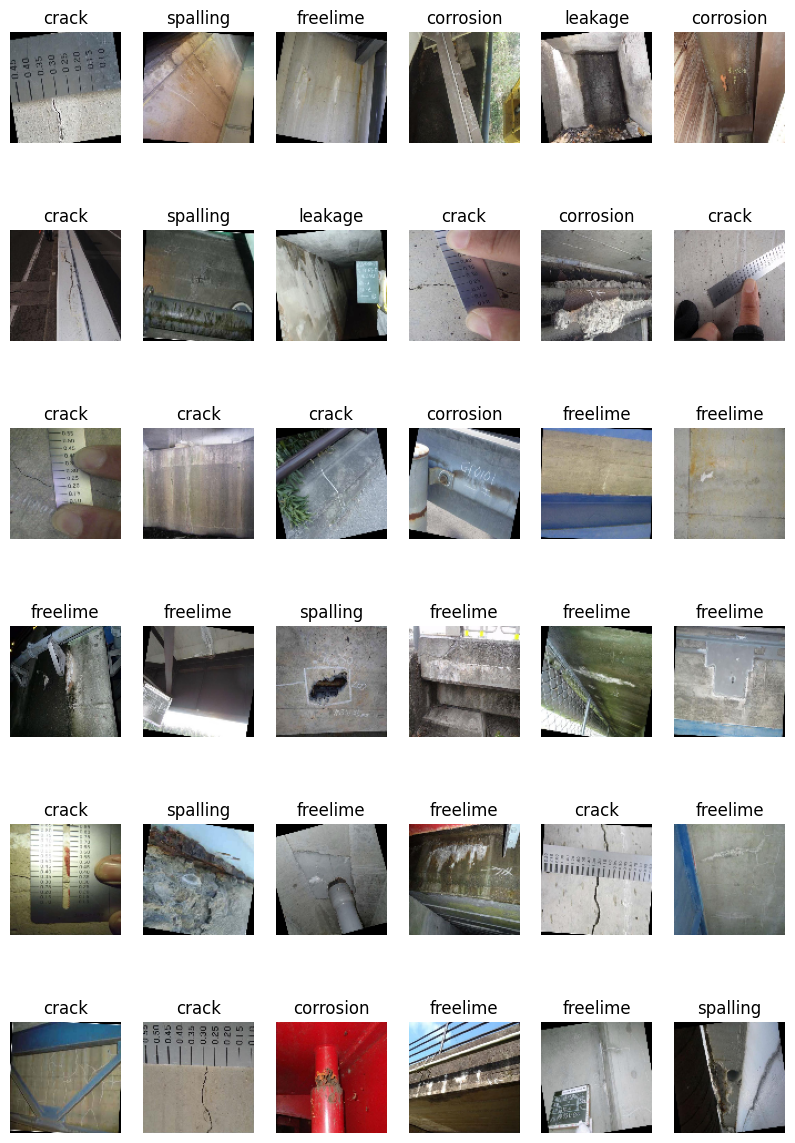

In [ ]:
plt.figure(figsize=(10, 15))
for n, i in enumerate(np.random.randint(0, len(train_images), 36)):
    plt.subplot(6, 6, n+1)
    # Convert BGR to RGB if necessary
    img_rgb = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(get_label(train_labels[i]))

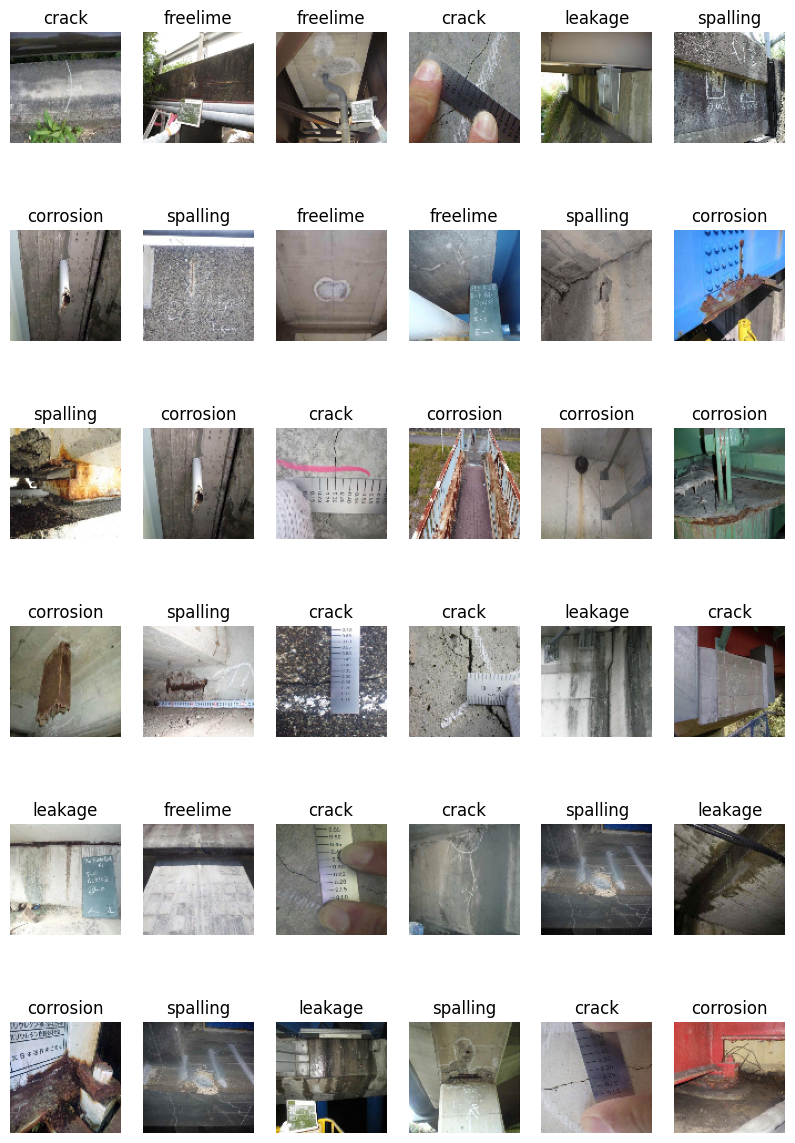

In [ ]:
plt.figure(figsize=(10, 15))
for n, i in enumerate(np.random.randint(0, len(test_images), 36)):
    plt.subplot(6, 6, n+1)
    img_rgb = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(get_label(test_labels[i]))
plt.show()

### Model Defining

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from transformers import Dinov2ForImageClassification

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_path = r'/content/updated/train'
test_path = r'/content/updated/valid'

In [ ]:
# Load datasets using ImageFolder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_data = ImageFolder(root=train_path, transform=train_transforms)
test_data = ImageFolder(root=test_path, transform=test_transforms)
num_labels = len(train_data.classes)
print("device", device)
print(f"Number of labels: {num_labels}")

# Data loaders
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False, num_workers=0)


model = Dinov2ForImageClassification.from_pretrained("facebook/dinov2-base", num_labels=num_labels)
model.to(device)

device cuda
Number of labels: 5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Dinov2ForImageClassification(
  (dinov2): Dinov2Model(
    (embeddings): Dinov2Embeddings(
      (patch_embeddings): Dinov2PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Dinov2Encoder(
      (layer): ModuleList(
        (0-11): 12 x Dinov2Layer(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attention): Dinov2SdpaAttention(
            (attention): Dinov2SdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): Dinov2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)

### Transfer Learning Technique

In [ ]:
# Freeze all layers in the DINOv2 model
for param in model.dinov2.parameters():
    param.requires_grad = False

# Unfreeze the classifier
for param in model.classifier.parameters():
    param.requires_grad = True

In [ ]:

from torchinfo import summary
summary(model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                                Input Shape          Output Shape         Trainable
Dinov2ForImageClassification (Dinov2ForImageClassification)            [32, 3, 224, 224]    [32, 5]              Partial
├─Dinov2Model (dinov2)                                                 [32, 3, 224, 224]    [32, 768]            False
│    └─Dinov2Embeddings (embeddings)                                   [32, 3, 224, 224]    [32, 257, 768]       False
│    │    └─Dinov2PatchEmbeddings (patch_embeddings)                   [32, 3, 224, 224]    [32, 256, 768]       False
│    │    └─Dropout (dropout)                                          [32, 257, 768]       [32, 257, 768]       --
│    └─Dinov2Encoder (encoder)                                         [32, 257, 768]       [32, 257, 768]       False
│    │    └─ModuleList (layer)                                         --                   --                   False
│    └─LayerNorm (layernorm)                 

### Training

In [ ]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import torch
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define your class names
class_names = ["corrosion", "crack", "freelime", "leakage", "spalling"]
num_classes = len(class_names)

# Initialize metrics lists
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
test_latencies = []
train_times = []  # To store training time per epoch

# Move the model to the appropriate device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Use CrossEntropyLoss for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 20
total_train_time = 0  # To accumulate total training time across all epochs

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    running_corrects = 0
    total_samples = 0

    # Start timer for training phase
    train_start_time = time.time()

    # Training phase
    for batch_idx, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits  # Shape: (batch_size, num_classes)

        # Calculate loss
        loss = loss_fn(outputs, labels)  # Labels are class indices (not one-hot encoded)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Get predictions (class with the highest logit)
        preds = torch.argmax(outputs, dim=1)  # Shape: (batch_size)

        # Calculate accuracy
        running_corrects += (preds == labels).sum().item()
        total_samples += labels.size(0)

        # Print every 10 batches
        if batch_idx % 10 == 0:
            batch_accuracy = (preds == labels).float().mean()
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx}/{len(train_dataloader)}], "
                  f"Loss: {loss.item():.4f}, Batch Accuracy: {batch_accuracy:.4f}")

    # End timer for training phase
    train_end_time = time.time()
    train_time = train_end_time - train_start_time
    train_times.append(train_time)  # Store training time for this epoch
    total_train_time += train_time  # Accumulate total training time

    # Calculate and store epoch-level metrics
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = running_corrects / total_samples
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Average Loss: {epoch_loss:.4f}, "
          f"Epoch Accuracy: {epoch_accuracy:.4f}, Training Time: {train_time:.4f}s")

    # Evaluation on test data
    model.eval()
    test_running_loss = 0
    test_running_corrects = 0
    test_total_samples = 0
    start_time = time.time()

    # Initialize lists to store all predictions and labels for precision, recall, and F1
    all_preds = []
    all_labels = []

    # Reset class-wise metrics at the beginning of evaluation
    total_instances = np.zeros(num_classes)
    correctly_identified = np.zeros(num_classes)
    missed_instances = np.zeros(num_classes)

    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits  # Shape: (batch_size, num_classes)

            # Calculate loss
            loss = loss_fn(outputs, labels)  # Labels are class indices

            test_running_loss += loss.item()

            # Get predictions (class with the highest logit)
            preds = torch.argmax(outputs, dim=1)  # Shape: (batch_size)

            # Calculate accuracy
            test_running_corrects += (preds == labels).sum().item()
            test_total_samples += labels.size(0)

            # Store predictions and labels for precision, recall, and F1
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Update class-wise metrics
            for i in range(num_classes):
                total_instances[i] += (labels == i).sum().item()
                correctly_identified[i] += ((preds == i) & (labels == i)).sum().item()
                missed_instances[i] += ((preds != i) & (labels == i)).sum().item()

    end_time = time.time()
    test_loss = test_running_loss / len(test_dataloader)
    test_accuracy = test_running_corrects / test_total_samples
    latency = end_time - start_time

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    # Store test metrics
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    test_latencies.append(latency)

    # Print metrics
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Latency: {latency:.4f}s")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Calculate and print class-wise accuracy
    class_wise_accuracy = correctly_identified / total_instances
    for i, class_name in enumerate(class_names):
        print(f"Class {class_name} Accuracy: {class_wise_accuracy[i]:.4f}")

Epoch [1/20], Batch [0/142], Loss: 2.3932, Batch Accuracy: 0.3438
Epoch [1/20], Batch [10/142], Loss: 2.1519, Batch Accuracy: 0.3125
Epoch [1/20], Batch [20/142], Loss: 1.1956, Batch Accuracy: 0.5625
Epoch [1/20], Batch [30/142], Loss: 1.2298, Batch Accuracy: 0.5000
Epoch [1/20], Batch [40/142], Loss: 1.1201, Batch Accuracy: 0.5312
Epoch [1/20], Batch [50/142], Loss: 1.2802, Batch Accuracy: 0.4062
Epoch [1/20], Batch [60/142], Loss: 1.2042, Batch Accuracy: 0.5312
Epoch [1/20], Batch [70/142], Loss: 1.0089, Batch Accuracy: 0.6875
Epoch [1/20], Batch [80/142], Loss: 1.1774, Batch Accuracy: 0.6250
Epoch [1/20], Batch [90/142], Loss: 1.0240, Batch Accuracy: 0.5625
Epoch [1/20], Batch [100/142], Loss: 0.7340, Batch Accuracy: 0.7500
Epoch [1/20], Batch [110/142], Loss: 0.8524, Batch Accuracy: 0.7188
Epoch [1/20], Batch [120/142], Loss: 0.9809, Batch Accuracy: 0.5312
Epoch [1/20], Batch [130/142], Loss: 0.7999, Batch Accuracy: 0.6875
Epoch [1/20], Batch [140/142], Loss: 1.0066, Batch Accuracy

### Results

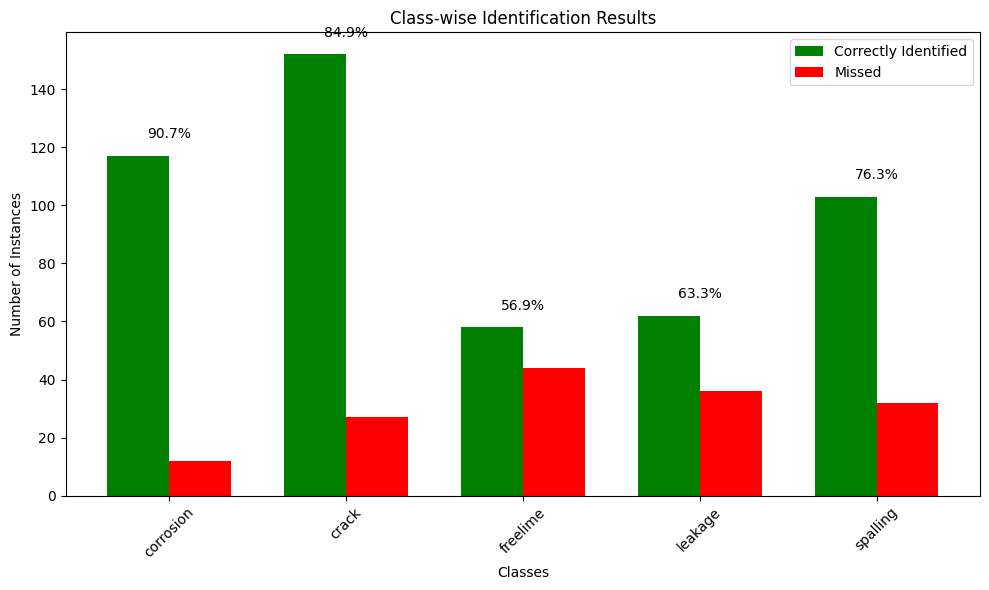


Class-wise Identification Summary:
Class      Total Instances Correctly Identified Missed          ID Rate        
---------------------------------------------------------------------------
corrosion  129.0           117.0                12.0            90.7           %
crack      179.0           152.0                27.0            84.9           %
freelime   102.0           58.0                 44.0            56.9           %
leakage    98.0            62.0                 36.0            63.3           %
spalling   135.0           103.0                32.0            76.3           %

Total Training Time: 2069.4008s


In [ ]:
def visualize_class_metrics(class_names, total_instances, correctly_identified, missed_instances):
    """
    Create a bar plot showing identification results for each class.
    """
    # Calculate identification rates
    identification_rates = correctly_identified / total_instances * 100
    missed_rates = missed_instances / total_instances * 100

    # Prepare the plot
    plt.figure(figsize=(10, 6))

    # Create bar positions
    x = np.arange(len(class_names))
    width = 0.35

    # Plot correctly identified instances
    plt.bar(x - width/2, correctly_identified, width, label='Correctly Identified', color='green')

    # Plot missed instances
    plt.bar(x + width/2, missed_instances, width, label='Missed', color='red')

    # Customize the plot
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.title('Class-wise Identification Results')
    plt.xticks(x, class_names, rotation=45)
    plt.legend()

    # Add text annotations for identification rates
    for i, rate in enumerate(identification_rates):
        plt.text(x[i], max(correctly_identified[i], missed_instances[i]) + 5,
                 f'{rate:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Create a summary table
    print("\nClass-wise Identification Summary:")
    print("{:<10} {:<15} {:<20} {:<15} {:<15}".format(
        "Class", "Total Instances", "Correctly Identified", "Missed", "ID Rate"))
    print("-" * 75)
    for i, name in enumerate(class_names):
        print("{:<10} {:<15} {:<20} {:<15} {:<15.1f}%".format(
            name,
            total_instances[i],
            correctly_identified[i],
            missed_instances[i],
            identification_rates[i]
        ))

# Visualize final class-wise metrics
visualize_class_metrics(class_names, total_instances, correctly_identified, missed_instances)

# Print total training time
print(f"\nTotal Training Time: {total_train_time:.4f}s")


Final Model Performance Metrics:
-------------------  -----------
Final Test Loss         0.67435
Final Test Accuracy     0.765163
Precision               0.76823
Recall                  0.765163
F1 Score                0.765436
Total Training Time  2069.4
-------------------  -----------


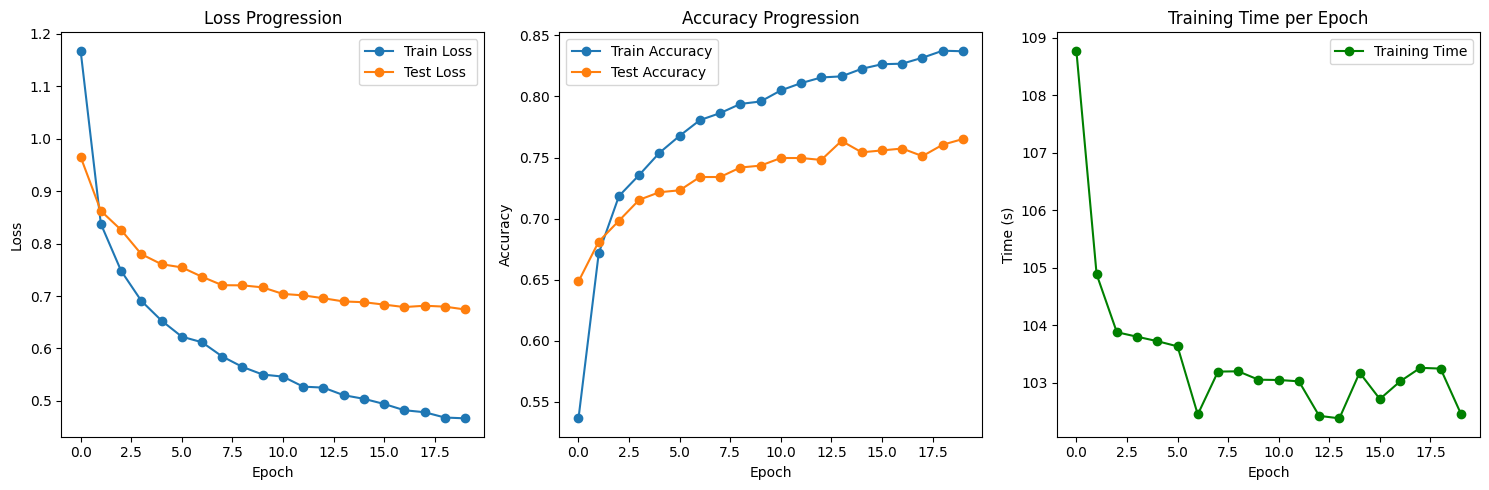

In [ ]:
def display_final_metrics_table():
    """
    Display final metrics in a compact table format
    """
    final_metrics = [
        ["Final Test Loss", test_losses[-1]],
        ["Final Test Accuracy", test_accuracies[-1]],
        ["Precision", precision],
        ["Recall", recall],
        ["F1 Score", f1],
        ["Total Training Time", total_train_time]
    ]

    print("\nFinal Model Performance Metrics:")
    print(tabulate(final_metrics, tablefmt="simple"))

def plot_final_metrics():
    """
    Plot final performance metrics across epochs
    """
    plt.figure(figsize=(15, 5))

    # Loss plot
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label="Train Loss", marker="o")
    plt.plot(test_losses, label="Test Loss", marker="o")
    plt.title("Loss Progression")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 3, 2)
    plt.plot(train_accuracies, label="Train Accuracy", marker="o")
    plt.plot(test_accuracies, label="Test Accuracy", marker="o")
    plt.title("Accuracy Progression")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Training time plot
    plt.subplot(1, 3, 3)
    plt.plot(train_times, label="Training Time", marker="o", color="green")
    plt.title("Training Time per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Time (s)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display final metrics table
display_final_metrics_table()

# Plot metrics progression
plot_final_metrics()

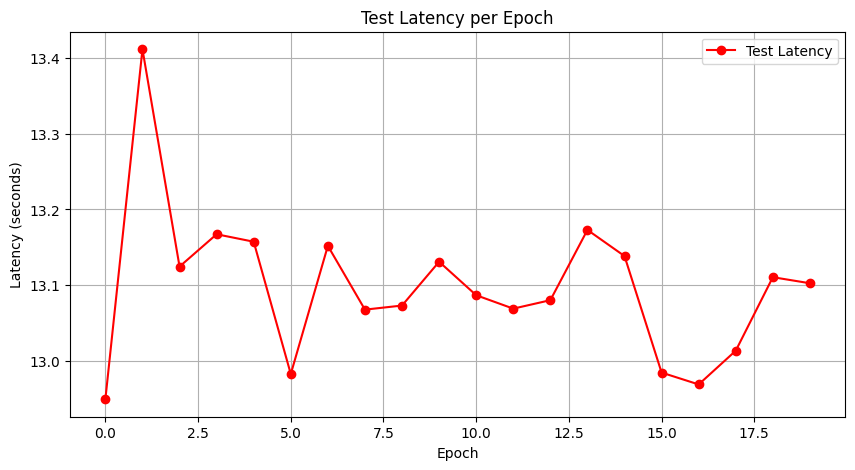

In [ ]:
def plot_latency(test_latencies):
    plt.figure(figsize=(10, 5))
    plt.plot(test_latencies, label="Test Latency", marker="o", color="red")
    plt.title("Test Latency per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Latency (seconds)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_latency(test_latencies)

In [ ]:
torch.save(model.state_dict(), 'dinov2_backboned-20epochs.pth')

### Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay


# Load the pre-trained DINOv2 model for binary classification
model_dino = Dinov2ForImageClassification.from_pretrained("facebook/dinov2-base", num_labels=5)
model_dino.classifier = torch.nn.Linear(model_dino.classifier.in_features, 5)
model_dino.load_state_dict(torch.load('/content/dinov2_backboned-20epochs.pth'))

for param in model_dino.dinov2.parameters():
    param.requires_grad = False

# Ensure the classifier is trainable
for param in model_dino.classifier.parameters():
    param.requires_grad = True


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_dino.to(device)


summary(model_dino,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-24-2353dfa7d691>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We re

Layer (type (var_name))                                                Input Shape          Output Shape         Trainable
Dinov2ForImageClassification (Dinov2ForImageClassification)            [32, 3, 224, 224]    [32, 5]              Partial
├─Dinov2Model (dinov2)                                                 [32, 3, 224, 224]    [32, 768]            False
│    └─Dinov2Embeddings (embeddings)                                   [32, 3, 224, 224]    [32, 257, 768]       False
│    │    └─Dinov2PatchEmbeddings (patch_embeddings)                   [32, 3, 224, 224]    [32, 256, 768]       False
│    │    └─Dropout (dropout)                                          [32, 257, 768]       [32, 257, 768]       --
│    └─Dinov2Encoder (encoder)                                         [32, 257, 768]       [32, 257, 768]       False
│    │    └─ModuleList (layer)                                         --                   --                   False
│    └─LayerNorm (layernorm)                 

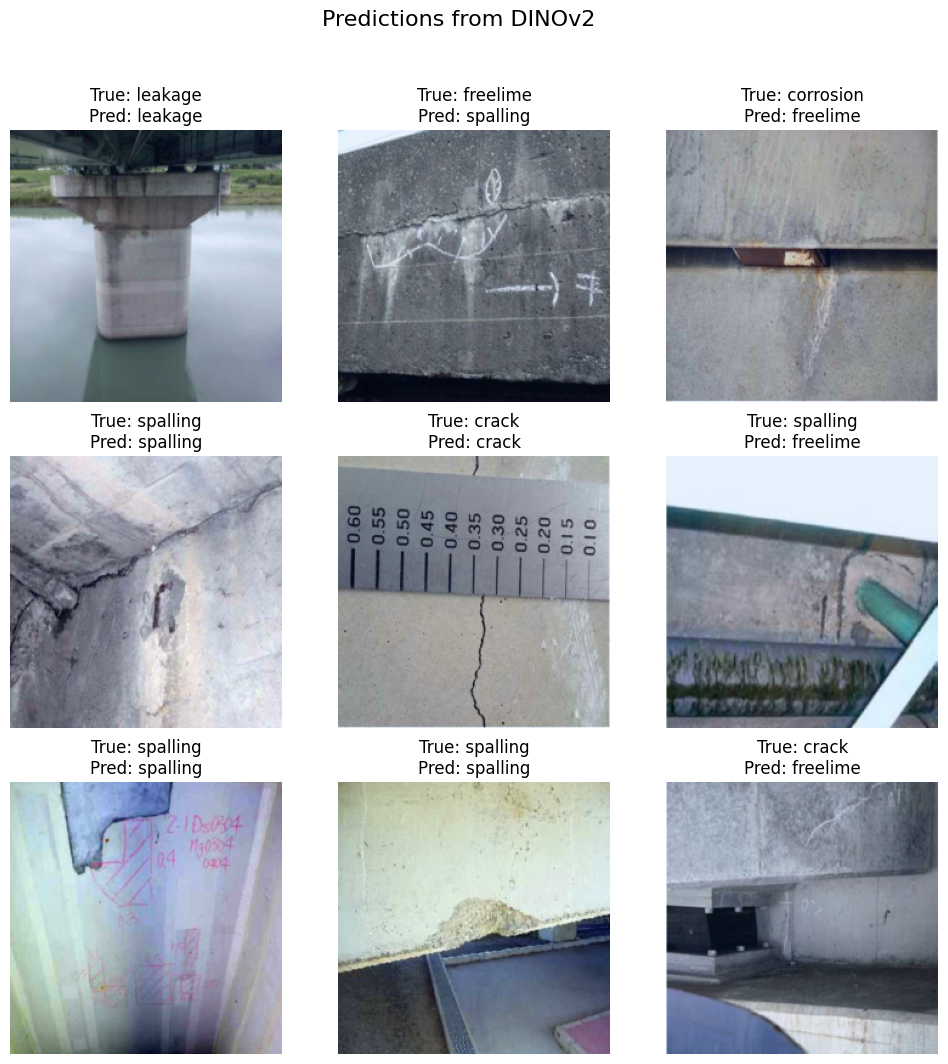

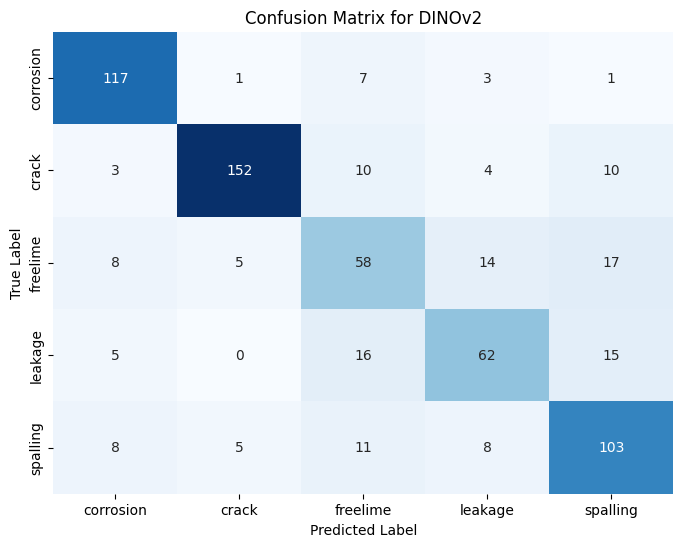

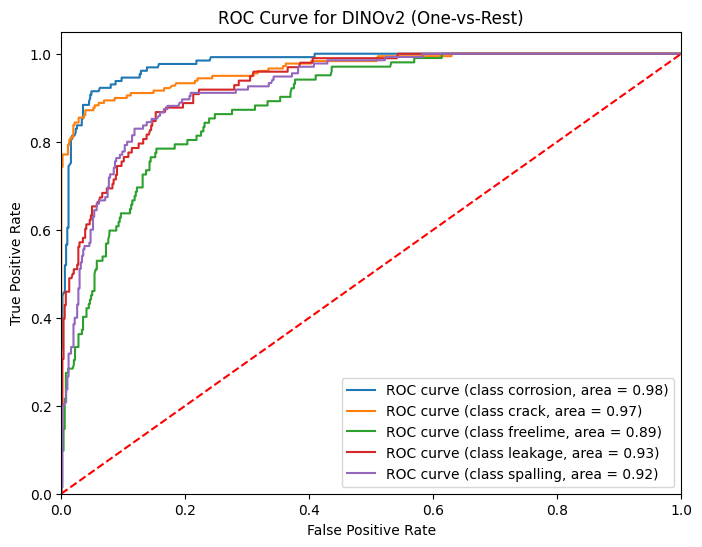

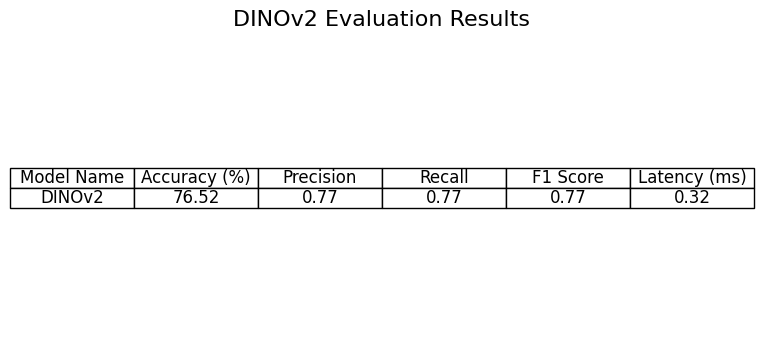

In [ ]:
import time
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd

# Function to evaluate the model
def evaluate_model(model, dataloader, device, class_names):
    model.eval()
    running_corrects = 0
    total_samples = 0
    total_latency = 0
    all_preds = []
    all_labels = []
    all_images = []
    all_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            start_time = time.time()
            outputs = model(images)
            end_time = time.time()

            total_latency += (end_time - start_time) * 1000  # Convert to milliseconds

            if hasattr(outputs, 'logits'):
                logits = outputs.logits
            else:
                logits = outputs  # For models without a 'logits' attribute

            probs = torch.softmax(logits, dim=1)  # Get probabilities for each class
            preds = torch.argmax(probs, dim=1)  # Get predicted class

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_images.extend(images.cpu().numpy())  # Store images for display
            all_probs.extend(probs.cpu().numpy())  # Store probabilities for ROC curve

            running_corrects += (preds == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = (running_corrects / total_samples) * 100
    avg_latency = total_latency / total_samples if total_samples > 0 else 0

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return accuracy, avg_latency, all_labels, all_preds, all_images, all_probs, precision, recall, f1

# Evaluate DINOv2 model
dino_accuracy, dino_latency, dino_labels, dino_preds, dino_images, dino_probs, dino_precision, dino_recall, dino_f1 = evaluate_model(
    model_dino, test_dataloader, device, class_names
)

# Function to display images and predictions
def display_predictions(images, labels, preds, class_names, model_name):
    plt.figure(figsize=(12, 12))
    random_indices = random.sample(range(len(images)), min(9, len(images)))  # Random selection of images
    for i in random_indices:
        plt.subplot(3, 3, random_indices.index(i) + 1)
        img = images[i].transpose(1, 2, 0)  # Transpose to get (H, W, C)
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]

        plt.imshow(img)  # Use the RGB image
        plt.title(f'True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}')
        plt.axis('off')
    plt.suptitle(f'Predictions from {model_name}', fontsize=16)
    plt.show()

# Display predictions for DINOv2
display_predictions(dino_images, dino_labels, dino_preds, class_names, 'DINOv2')

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrix for DINOv2
plot_confusion_matrix(dino_labels, dino_preds, class_names, 'DINOv2')

# Function to plot ROC curve (One-vs-Rest for multiclass)
def plot_roc_curve(y_true, y_probs, class_names, model_name):
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))  # Binarize labels
    n_classes = len(class_names)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {class_names[i]}, area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} (One-vs-Rest)')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve for DINOv2
plot_roc_curve(dino_labels, np.array(dino_probs), class_names, 'DINOv2')


# Model evaluation results
results_df = pd.DataFrame({
    'Model Name': ['DINOv2'],
    'Accuracy (%)': [round(dino_accuracy, 2)],  # Round to 2 decimal places
    'Precision': [round(dino_precision, 2)],    # Round to 2 decimal places
    'Recall': [round(dino_recall, 2)],          # Round to 2 decimal places
    'F1 Score': [round(dino_f1, 2)],            # Round to 2 decimal places
    'Latency (ms)': [round(dino_latency, 2)]    # Round to 2 decimal places
})

# Display results in a table
plt.figure(figsize=(8, 4))
plt.axis('off')
table = plt.table(cellText=results_df.values,
                  colLabels=results_df.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale table size
plt.title('DINOv2 Evaluation Results', fontsize=16)
plt.show()

### Model Profiling

Batch Size: 1, Avg Inference Time per Sample: 9.52 ms
Batch Size: 2, Avg Inference Time per Sample: 4.24 ms
Batch Size: 4, Avg Inference Time per Sample: 2.21 ms
Batch Size: 8, Avg Inference Time per Sample: 1.01 ms
Batch Size: 16, Avg Inference Time per Sample: 0.59 ms
Batch Size: 32, Avg Inference Time per Sample: 0.42 ms
Batch Size: 64, Avg Inference Time per Sample: 0.16 ms


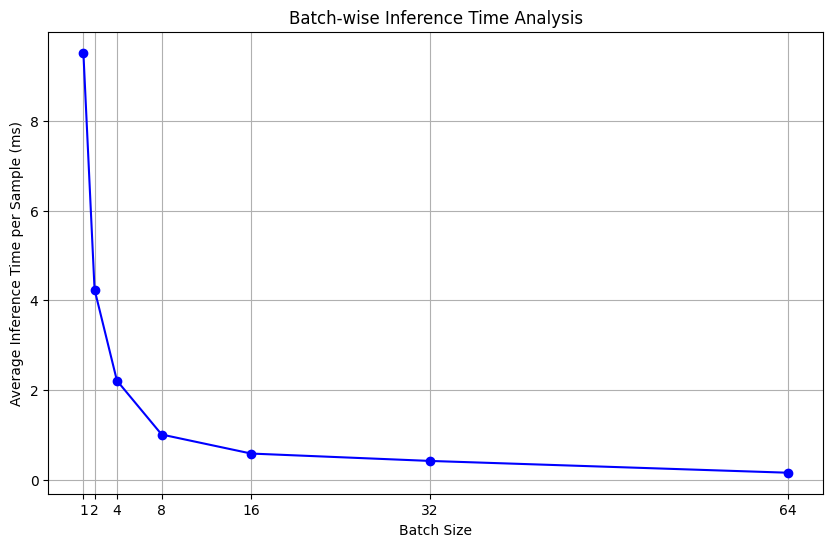

In [ ]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt

# Function to measure inference time for different batch sizes
def batch_wise_inference_analysis(model, dataset, device, batch_sizes):
    inference_times = []
    model.eval()

    for batch_size in batch_sizes:
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)
        total_time = 0
        total_samples = 0

        with torch.no_grad():
            for images, _ in dataloader:
                images = images.to(device)

                start_time = time.time()
                _ = model(images)  # Perform inference
                end_time = time.time()

                total_time += (end_time - start_time) * 1000  # Convert to milliseconds
                total_samples += images.size(0)

        avg_time_per_sample = total_time / total_samples
        inference_times.append(avg_time_per_sample)

        print(f"Batch Size: {batch_size}, Avg Inference Time per Sample: {avg_time_per_sample:.2f} ms")

    return inference_times

# Define batch sizes to test
batch_sizes = [1, 2, 4, 8, 16, 32, 64]

# Perform batch-wise inference analysis
inference_times = batch_wise_inference_analysis(model_dino, test_data, device, batch_sizes)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, inference_times, marker='o', linestyle='-', color='b')
plt.title('Batch-wise Inference Time Analysis')
plt.xlabel('Batch Size')
plt.ylabel('Average Inference Time per Sample (ms)')
plt.grid(True)
plt.xticks(batch_sizes)
plt.show()

In [2]:
from transformers import Dinov2ForImageClassification
import torch
import time
import numpy as np
import tensorrt as trt
import pycuda.driver as cuda
import pycuda.autoinit
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

def load_pytorch_model(model_path, num_classes=5):
    """Load PyTorch model with proper initialization"""
    # Create model instance first
    model = Dinov2ForImageClassification.from_pretrained("facebook/dinov2-base", num_labels=num_classes)
    # Load saved state dict
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)
    return model

def measure_pytorch_inference(model, dataloader, device):
    """Measure PyTorch model inference time"""
    model.eval()
    latencies = []
    
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            
            # Warm-up runs
            for _ in range(10):
                _ = model(images).logits
            
            # Actual measurement
            start_time = time.time()
            _ = model(images).logits
            end_time = time.time()
            
            latencies.append((end_time - start_time) * 1000)
    
    return np.mean(latencies)

def measure_tensorrt_inference(engine, dataloader):
    """Measure TensorRT engine inference time"""
    context = engine.create_execution_context()
    latencies = []
    
    for images, _ in dataloader:
        input_batch = images.numpy()
        
        # Allocate device memory
        d_input = cuda.mem_alloc(input_batch.nbytes)
        output = np.empty((images.shape[0], 5), dtype=np.float32)
        d_output = cuda.mem_alloc(output.nbytes)
        
        stream = cuda.Stream()
        
        # Warm-up runs
        for _ in range(10):
            cuda.memcpy_htod_async(d_input, input_batch, stream)
            context.execute_async_v3(stream_handle=stream.handle)
            cuda.memcpy_dtoh_async(output, d_output, stream)
            stream.synchronize()
        
        # Actual measurement
        start_time = time.time()
        cuda.memcpy_htod_async(d_input, input_batch, stream)
        context.execute_async_v3(stream_handle=stream.handle)
        cuda.memcpy_dtoh_async(output, d_output, stream)
        stream.synchronize()
        end_time = time.time()
        
        latencies.append((end_time - start_time) * 1000)
        
        d_input.free()
        d_output.free()
    
    return np.mean(latencies)

def main():
    # Setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Load dataset
    dataset = ImageFolder(
        r"C:\Users\shiva\Desktop\EXCEED\Dataset\BridgeInspection\Classification-CI\valid", 
        transform=transform
    )
    dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

    # Load and prepare PyTorch model
    pytorch_model = load_pytorch_model(
        r"C:\Users\shiva\Desktop\EXCEED\ModelWrappers\BridgeDefects\Dinov2\assets\dinov2_backboned_grayscale.pth"
    )
    pytorch_model = pytorch_model.to(device)
    
    # Load TensorRT engine
    TRT_LOGGER = trt.Logger(trt.Logger.WARNING)
    runtime = trt.Runtime(TRT_LOGGER)
    with open(r"C:\Users\shiva\Desktop\EXCEED\ModelWrappers\BridgeDefects\Dinov2\assets\model.trt", "rb") as f:
        trt_engine = runtime.deserialize_cuda_engine(f.read())
    
    # Measure inference times
    print("Measuring PyTorch inference time...")
    pytorch_latency = measure_pytorch_inference(pytorch_model, dataloader, device)
    print(f"PyTorch Average Inference Time: {pytorch_latency:.2f} ms")
    
    print("\nMeasuring TensorRT inference time...")
    tensorrt_latency = measure_tensorrt_inference(trt_engine, dataloader)
    print(f"TensorRT Average Inference Time: {tensorrt_latency:.2f} ms")
    
    # Compare results
    speedup = pytorch_latency / tensorrt_latency if tensorrt_latency > 0 else float('inf')
    print(f"\nSpeedup: {speedup:.2f}x")
    if tensorrt_latency < pytorch_latency:
        print("TensorRT optimization successful!")
    else:
        print("TensorRT is slower than PyTorch. Consider checking configuration.")

if __name__ == "__main__":
    main()

Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\shiva\AppData\Local\Temp\ipykernel_5344\1479186834.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serial

Measuring PyTorch inference time...
PyTorch Average Inference Time: 489.97 ms

Measuring TensorRT inference time...
TensorRT Average Inference Time: 4.03 ms

Speedup: 121.49x
TensorRT optimization successful!
